# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,A,5.386353
1,0.000628,A,7.417191
2,0.001257,B,0.964302
3,0.001885,A,9.932511
4,0.002514,A,5.897736


Text(0.5, 1.0, 'Scatter plot of X1 against y with respect to X2')

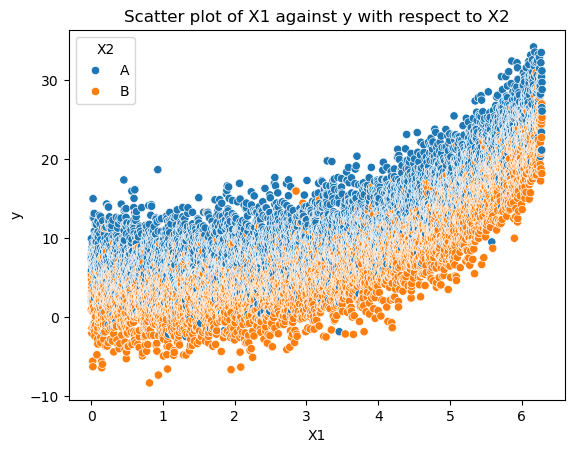

In [37]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Scatter plot of X1 against y with respect to X2')

<b> The scatterplot above is essentially X1 vs y parameters with respct to X2. It looks like X1 and y are somewhat non-linearly related, as when X1 is increasing, y also seems to be increasing. However, this pattern is not exactly a straight line. When X1 is increasing, Y is increasing but in curve style trend. It can possibly be a exponential or even polynomial relationship.  This pattern applies to both A and B categories from X2. In fact, the X1 and y values of category A of X2 are generally higher than their B counterparts.

Text(0.5, 1.0, 'Scatter plot of X1 against y with respect to X2 (1000 rows sampled)')

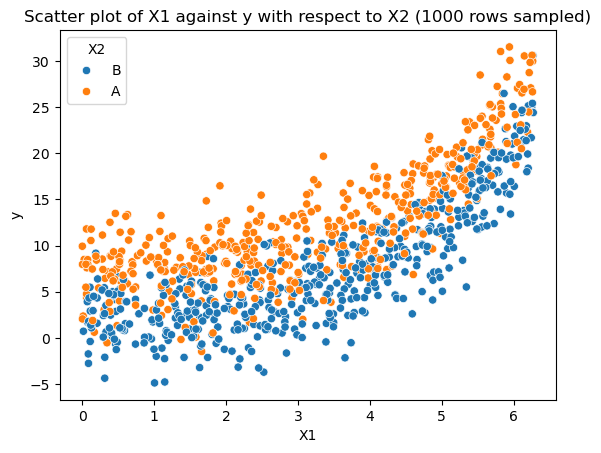

In [38]:
# todo: add the same title as above

sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')
plt.xlabel('X1')
plt.ylabel('y')
plt.title('Scatter plot of X1 against y with respect to X2 (1000 rows sampled)')

<b> The scatterplot above is essentially X1 vs y parameters with respct to X2 with only 1000 random rows sampled from the dataframe. It looks like X1 and y are somewhat non-linearly related, as when X1 is increasing, y also seems to be increasing. However, this pattern is not exactly a straight line. When X1 is increasing, Y is increasing but in curve style trend. It can possibly be a exponential or even polynomial relationship.  This pattern applies to both A and B categories from X2. In fact, the X1 and y values of category A of X2 are generally higher than their B counterparts.

In [ ]:
# creating our feature matrix and target vector
X = df[['X1', 'X2']]
y = df.y

In [40]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,A
2,0.001257,B
3,0.001885,A
4,0.002514,A


In [44]:
# creating an object for scikit-learn's LinearRegression class
model = LinearRegression()
model.fit(X[['X1']], y)

# this is the R^2 score, also called coefficient of determination
model.score(X[['X1']], y) 

0.5747833485675259

In [45]:
# making predictions and calculating the R^2 score
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5747833485675259

Text(0.5, 1.0, 'X1 vs Predicted values of y, along with the X2 categories')

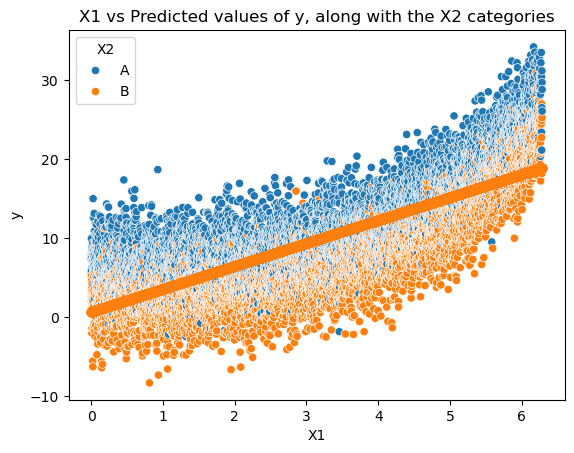

In [50]:
# todo: add a proper title
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)
plt.title("X1 vs Predicted values of y, along with the X2 categories")

<b> Here, the orange colored line represets the prediction made by our linear regression model for the value of X1. Whereas, the blue and orange scatters represent the valyes of y given X1 for categories A and B. Based on the scatterplot above, it looks like model is underfitting (it is unable to understand the relationship in the data).  This is also true because the data shows curve pattern (which is nonlinear) and such a relationship is very difficult for a simple single-linear model like this. We can try this by using maybe 2 or 3 degree polynomial regression or maybe even use the categorical variables as one-hot encoded features and see if the model's performance increases or not. Even then, given a non-linear trend, more robust models may be the right choise for this problem.

Text(0, 0.5, 'Residuals (y_pred - y)')

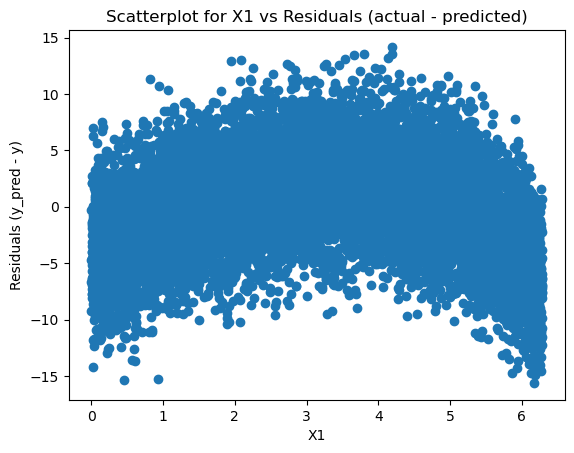

In [54]:
# todo: add a proper title

plt.scatter(X.X1, y_pred-y)
plt.title("Scatterplot for X1 vs Residuals (actual - predicted)")
plt.xlabel("X1")
plt.ylabel("Residuals (y_pred - y)")

<b> This is interesting. If our linear regression model worked well, the residuals would have formed a blob like structure near 0. But, in this case, there is actually a shape that has formed. If we look closely, the model seems to underpredict for X1 values from 0 - 3 and then, overpredict for some values in the middile and same pattern, creating a curved pattern. It further solidifies our hypothesis that the data is a non-linear problem, which linear regression is not able to address properly. Model is clearly underfitting.

Text(0, 0.5, 'Frequency')

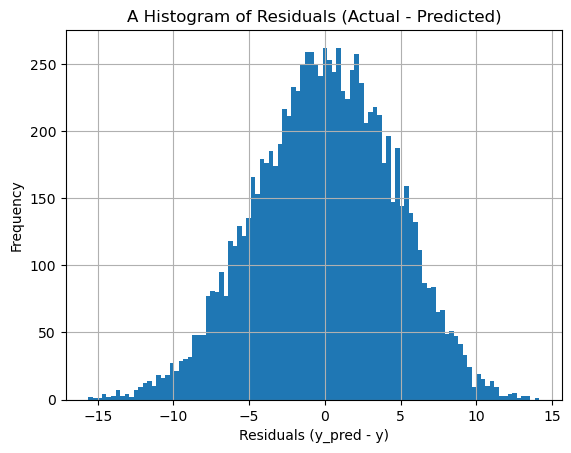

In [55]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title("A Histogram of Residuals (Actual - Predicted)")
plt.xlabel("Residuals (y_pred - y)")
plt.ylabel("Frequency")

The same can be answered here from the histogram. Majority of X1 predicted values have residuals closer to 0, whereas there are huge residuals on both sides of the histogram (negatives and positives). Furthremore, the residuals are in bell-shaped (normal distribution). This essentially means that our model's residuals are distributed symmetrically around 0  and they are random and our model is not really biased. 

#### Todo: 
Explain findings in the graphs above & what we can try next

In [56]:
# todo: explain the code below, what we do & why we do it? 

# this will essentially extract polynomial features from the X1 column at degree 2 - 
# - and store them in a new DataFrame. This means, we are projecting our feature X1 into a polynomial space with degree 2
# this can help capture any non-linear relationships between X1 and y (our linear model was underfitting previously) Thats why we are doing this
transform = PolynomialFeatures(degree=2)

# transforming the data
X_data = transform.fit_transform(X[['X1']])

# training our linear regression model with extracted new features
model = LinearRegression()
model.fit(X_data, y)

model.score(X_data, y) 

0.6757229985881134

In [57]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.6757229985881134

<b> As we can see. The R-squared has improved. This is because we have used 2-degree polynomail features that are able to capture non-linear relationships between X1 and y. </b>

Text(0.5, 1.0, 'X1 vs Predicted values of y (with 2-deg polynomial features), along with the X2 categories')

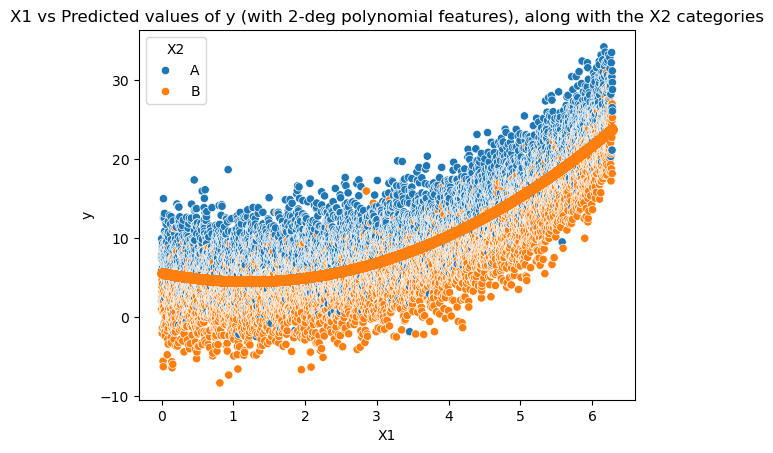

In [62]:
# todo: add a proper title

sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)
plt.title("X1 vs Predicted values of y (with 2-deg polynomial features), along with the X2 categories")

<b> We can now see that our model's straight line has changed into a curved line, which follows the pattern in the data. We can say that our model is not able to capture theese non-linear relationships much better than the previous model, which was just a linear model. If we keep on increasing the degree of the model, we should be able to do even better but as we increaes the degree of polynomials, our model's complexity will start to increase, which can easily lead to overfitting. We need an optimal tradeoff between bias and variance in this case.

Text(0, 0.5, 'Residuals (y_pred - y)')

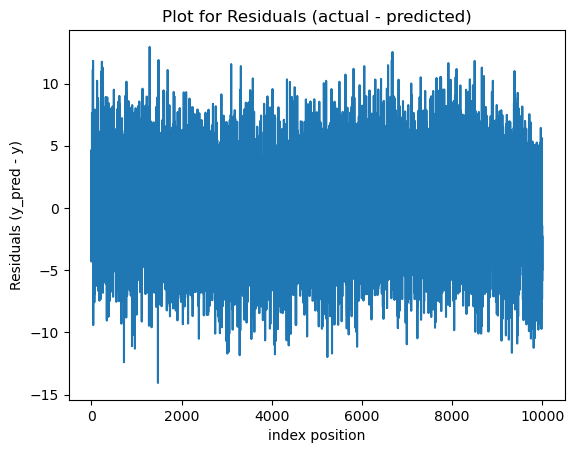

In [64]:
# todo: add a proper title

(y_pred-y).plot()
plt.title("Plot for Residuals (actual - predicted)")
plt.xlabel("index position")
plt.ylabel("Residuals (y_pred - y)")

<b> We can now see that there is a blob shape centered around 0 this time. Previously, there was a shape. The model is performing better than our previous model, which is good.

Text(0, 0.5, 'Frequency')

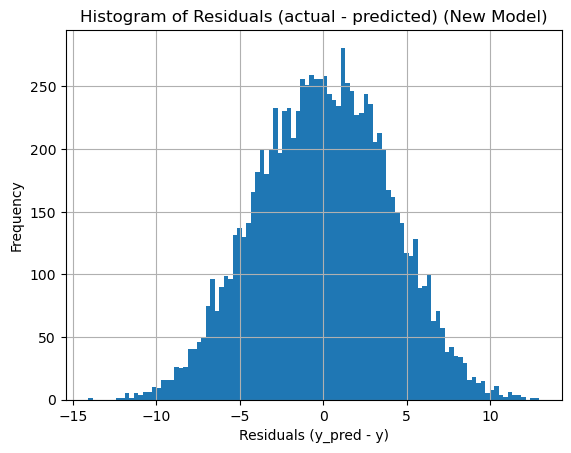

In [66]:
# todo: add a proper title

(y_pred-y).hist(bins=100)
plt.title("Histogram of Residuals (actual - predicted) (New Model)")
plt.xlabel("Residuals (y_pred - y)")
plt.ylabel("Frequency")

<b> The same can be answered here from the histogram. Majority of X1 predicted values have residuals closer to 0, whereas there are some residuals on both sides of the histogram (negatives and positives). Furthremore, the residuals are in bell-shaped (normal distribution). This essentially means that our model's residuals are distributed symmetrically around 0  and they are random and our model is not really biased. 

Compared to the previous histogram (for linear regression), the new residuals are smaller, indicating that our new model is capturing relationships in our data more accurately than our previous model.

<b> We can choose to extract higher level polynomial features (3, 4, 5) and train the model, which will likely lead to better performance. However, we must also do robust validation of model performance on a completely seperated validation dataset, along with a final test in an unseen test dataset to ensure that our more complex models are not overfitting. If they are overfitting, we can either reduce the complexity (lower the degree of polynomial) or introduce regularization (L1 or L2).

##  Finally:

In [67]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [68]:
# generating one-hot encoded features for our categorical column
encoder = OneHotEncoder(drop='first')

categorical_features = ['X2']
encoded = encoder.fit_transform(X[categorical_features])

In [69]:
encoded_df = pd.DataFrame(
    data=encoded.todense(), 
    columns=encoder.get_feature_names_out()
)

In [73]:
X

,X1,X2
0,0.000000,A
1,0.000628,A
2,0.001257,B
3,0.001885,A
4,0.002514,A
...,...,...
9995,6.280672,A
9996,6.281300,B
9997,6.281929,A
9998,6.282557,A


In [74]:
# here, we are essentially joining the one-hot encoded features with our original numerical features
# here, each row for column X2 with value B will have value 1 and A will have value 0.
# Finally, this will be our new feature matrix

numerical_features = ['X1']
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,0.0
2,0.001257,1.0
3,0.001885,0.0
4,0.002514,0.0


In [75]:
# todo: explain the code

# using the new feature matrix to extract polynomial features with dergee 2(which is by default if not changed in the class below)
# finally, using the new data as the input to our linear regression model
poly = PolynomialFeatures()
X_data = poly.fit_transform(X_new)

# create and train our model
model = LinearRegression()
model.fit(X_data, y)

# calculating the models coefficient of determination
model.score(X_data, y) 

0.8085323215354008

In [76]:
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8085323215354008

<b> Well, the model's coefficient of determination increased from ~0.67 to ~0.80. Thats a huge improvement, even with the same degree of polynomials. This is due to the fact that we included one more categorical column that was one-hot encoded, which provided our regression model with more leverage with the data.

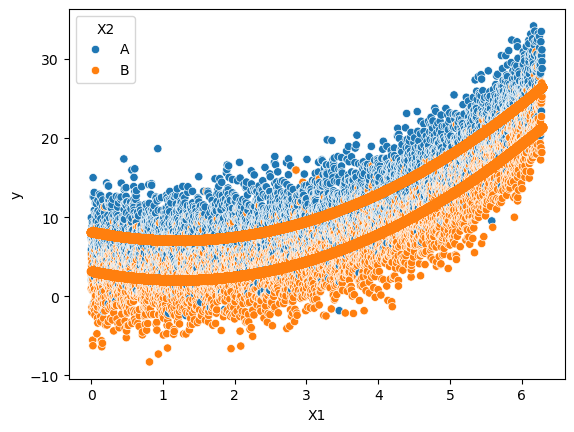

In [93]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title
# 
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

<b> Here, it looks like the model learned different coefficients for each category in X2. Regardless, its performance is much better as the curve seems to be following the pattern in the data. The model seems to have learned two curves (one for X2=A other for X2=B). It will be interesting to see this chart again with higher degree polynomial regression. 

Text(0, 0.5, 'Residuals (y_pred - y)')

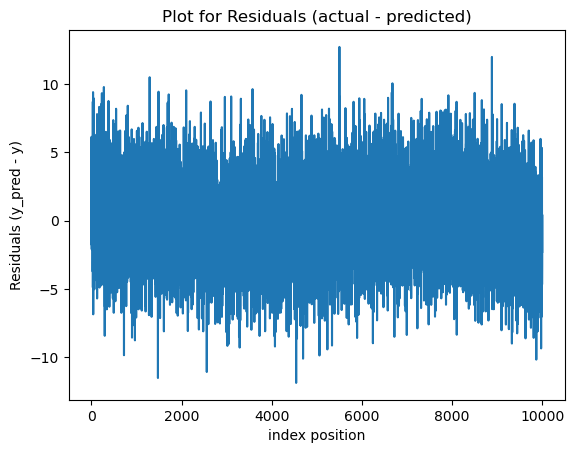

In [94]:
(y_pred-y).plot()
plt.title("Plot for Residuals (actual - predicted)")
plt.xlabel("index position")
plt.ylabel("Residuals (y_pred - y)")

<b> This is also similar to our earlier plot. The residuals seem to have reduced much in this case as compared to the previous plot, indicating that our modle is doing very well. Howwver, for some samples, there are huge positive and negative residuals. There could be some random noise in the data as well, which our model could probably not understand.

Text(0, 0.5, 'Frequency')

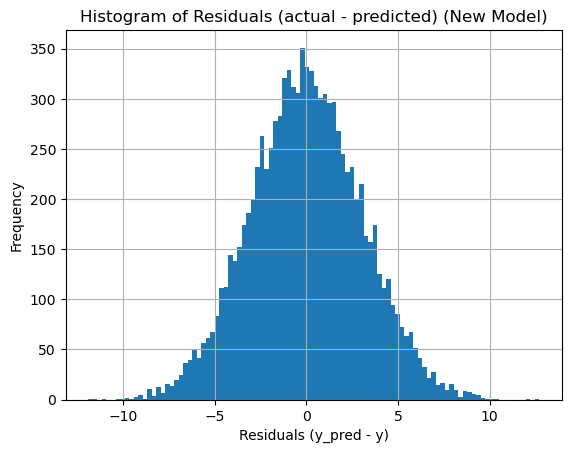

In [95]:
(y_pred-y).hist(bins=100)
plt.title("Histogram of Residuals (actual - predicted) (New Model)")
plt.xlabel("Residuals (y_pred - y)")
plt.ylabel("Frequency")

<b> The residuals are normally distributed/centered around 0. There are very few extremely large residuals in the either distrubution but majority of them are distributed around 0, which is indicating that our model is working pretty well.

## Create a train-test split

In [96]:
'''
So far, we created a model, trained it on a dataset, and evaluted it on the very same dataset. 
Model showed good performance on the data it was trained on. This time, we will create both training and test set and evalute model performance on a standalone 
test set to truly evaluate its performance and accuracy
'''


# splitting the data into train and test sets
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.
 
 __eg:__
 
 `encoded_training = encoder.fit_transform(X_train[categorical_features])`
 
 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [97]:
X_training.head()

,X1,X2
3334,2.095023,A
6335,3.980796,A
308,0.193541,B
8408,5.283431,B
7152,4.494184,A


In [98]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

# same as explained earlier, one hot encodoing
encoder= OneHotEncoder(drop='first')
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])


X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
3334,2.095023,0.0
6335,3.980796,0.0
308,0.193541,1.0
8408,5.283431,1.0
7152,4.494184,0.0


In [99]:
m = LinearRegression().fit(X_training2, y_training)

X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
m.score(X_test2, y_test)

0.7037917948293203

## Create a pipeline

Add comments to `todo` parts

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

# this pipeline will transfrom the original data to extract polynomial features in 2-degree space.
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# this pipeline will handle one-hot encoding process
cat_pipeline = Pipeline([
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# this pipeline will combine the above two pipelines: onehot encoding and 2-degree polynomial feature extraction
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

# final pipleline that combines everything including model training
modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [101]:
# traininig the entire pipleine
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [104]:
# testing model performance on train set
modeling_pipeline.score(X_training, y_training)

0.8093200346314632

In [105]:
# testing model performance on test set
modeling_pipeline.score(X_test, y_test)

0.8059497362089814

## Evaluate/create residual plots

In [35]:
y_pred = modeling_pipeline.predict(X_test)

In [36]:
# code

## Explain findings

Explain findings